In [ ]:

#  Various charting, visulaizations
#

#  From,
#     http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/



In [3]:

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

#  from pandas.tools.plotting import parallel_coordinates
from pandas.plotting import parallel_coordinates


print("--")


--


In [53]:

#  Generate data
#

l_data = {}
   #
l_data["xycoord"], l_data["label"] = make_blobs(n_samples = 20, centers = 3, n_features = 2, random_state = 0)

print(l_data["xycoord"])
print(l_data["label"  ])

print("--")


[[ 1.12031365  5.75806083]
 [-1.91423083  2.61557951]
 [ 1.28933778  3.44969159]
 [ 2.21021495  1.27582618]
 [ 4.32502215 -0.55670201]
 [-2.57545698  1.49786432]
 [-3.2331742   4.86865766]
 [ 1.16748177 -1.08313281]
 [ 0.87305123  4.71438583]
 [ 1.9263585   4.15243012]
 [ 3.58804674  2.36702243]
 [ 2.47034915  4.09862906]
 [-0.49772229  1.55128226]
 [ 2.10102604  0.71047981]
 [ 1.7373078   4.42546234]
 [-2.03655619  2.47980796]
 [-0.29661333  4.12026211]
 [-1.87481616  3.07423123]
 [ 2.91970372  0.15549864]
 [ 1.42013331  4.63746165]]
[0 2 0 1 1 2 2 1 0 0 1 0 1 1 0 2 2 2 1 0]
--


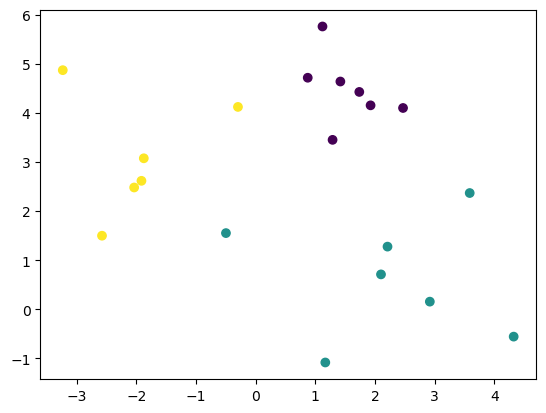

In [56]:

#  Bare minimum control
#

plt.scatter(l_data["xycoord"][:,0], l_data["xycoord"][:,1], c = l_data["label"])
   #        |<----  x-coord ---->|  |<---- y-coord  ---->|
    
plt.show()


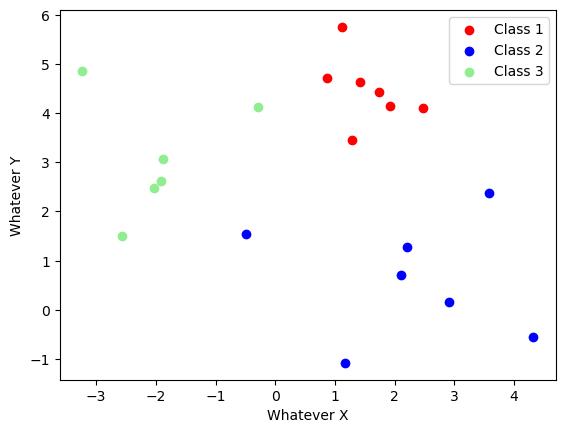

In [57]:

#  More control over display
#

plt.scatter(l_data["xycoord"][l_data["label"]==0][:, 0], l_data["xycoord"][l_data["label"]==0][:, 1], c = "red"       , label = "Class 1")
plt.scatter(l_data["xycoord"][l_data["label"]==1][:, 0], l_data["xycoord"][l_data["label"]==1][:, 1], c = "blue"      , label = "Class 2")
plt.scatter(l_data["xycoord"][l_data["label"]==2][:, 0], l_data["xycoord"][l_data["label"]==2][:, 1], c = "lightgreen", label = "Class 3")
   #        |<----  x-coord                      ---->|  |<----  y-coord                      ---->|
   #                         |<--- filter  ---->|                         |<--- filter  ---->|                                          
   #                  0'th dim, the x-coord ---->|    |<----                             ---->|    |<---- 1st dim, the y-coord
   # 
    
plt.legend()
   #
plt.xlabel('Whatever X')
plt.ylabel('Whatever Y')

plt.show()


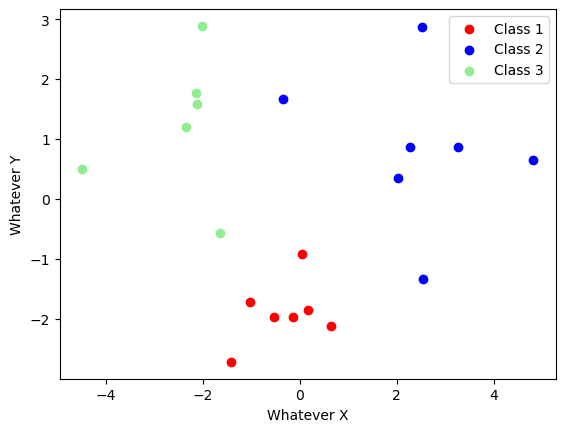

In [58]:

#  Normalizing the datausing PCA
#
#     (The data gets inverted)
#

l_pca = sklearnPCA(n_components = 2)                        #  2-dimensional PCA

l_data["pca"] = l_pca.fit_transform(l_data["xycoord"])

   #
    
plt.scatter(l_data["pca"][l_data["label"]==0][:, 0], l_data["pca"][l_data["label"]==0][:, 1], c = "red"       , label = "Class 1")
plt.scatter(l_data["pca"][l_data["label"]==1][:, 0], l_data["pca"][l_data["label"]==1][:, 1], c = "blue"      , label = "Class 2")
plt.scatter(l_data["pca"][l_data["label"]==2][:, 0], l_data["pca"][l_data["label"]==2][:, 1], c = "lightgreen", label = "Class 3")
    
plt.legend()
   #
plt.xlabel('Whatever X')
plt.ylabel('Whatever Y')

plt.show()
    


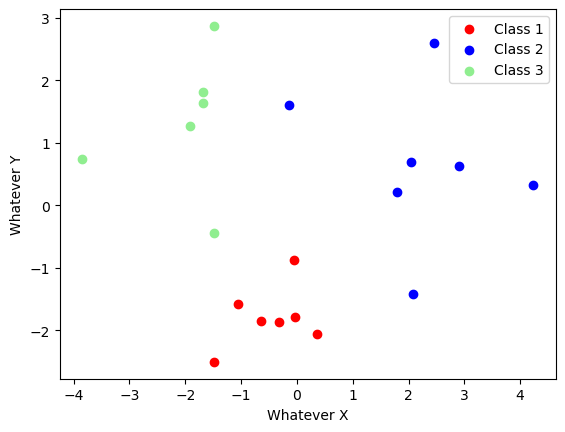

In [59]:

#  Normalizing the data using LDA
#

l_lda = LDA(n_components = 2)                             #  2-dimensional LDA

l_data["lda"] = l_lda.fit_transform(l_data["xycoord"], l_data["label"])

   #
    
plt.scatter(l_data["lda"][l_data["label"]==0][:, 0], l_data["lda"][l_data["label"]==0][:, 1], c = "red"       , label = "Class 1")
plt.scatter(l_data["lda"][l_data["label"]==1][:, 0], l_data["lda"][l_data["label"]==1][:, 1], c = "blue"      , label = "Class 2")
plt.scatter(l_data["lda"][l_data["label"]==2][:, 0], l_data["lda"][l_data["label"]==2][:, 1], c = "lightgreen", label = "Class 3")
    
plt.legend()
   #
plt.xlabel('Whatever X')
plt.ylabel('Whatever Y')

plt.show()


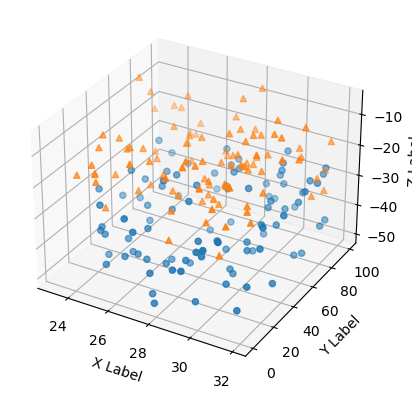

In [63]:

#  3 dimension example, not curates, does run
#
#  Frrom,
#     https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
#

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
   xs = randrange(n, 23, 32)
   ys = randrange(n, 0, 100)
   zs = randrange(n, zlow, zhigh)
   ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


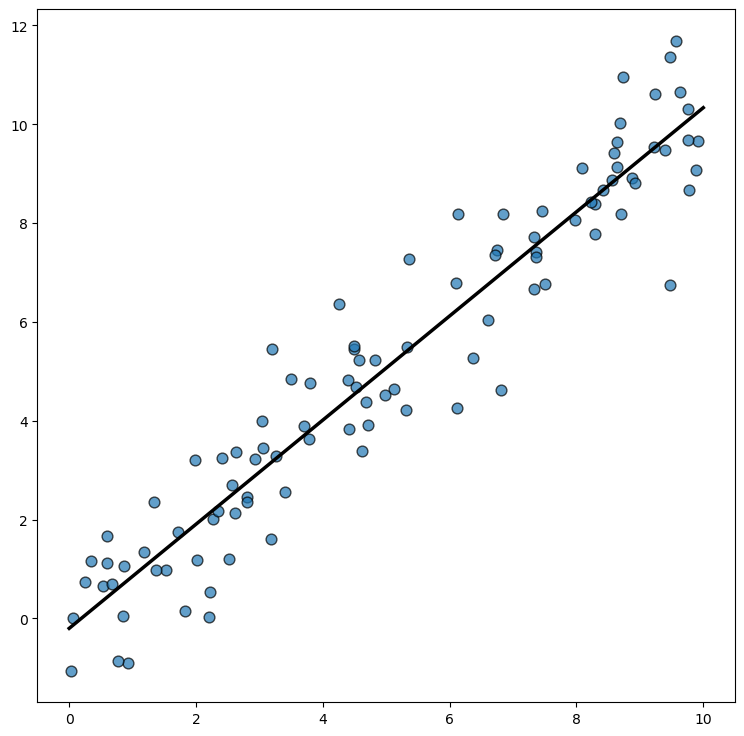

In [65]:

#  Linear regression plot
#
#  From,
#     https://www.python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib
#

rng = np.random.default_rng(1234)

# Generate data
x = rng.uniform(0, 10, size=100)
y = x + rng.normal(size=100)

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 10, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);


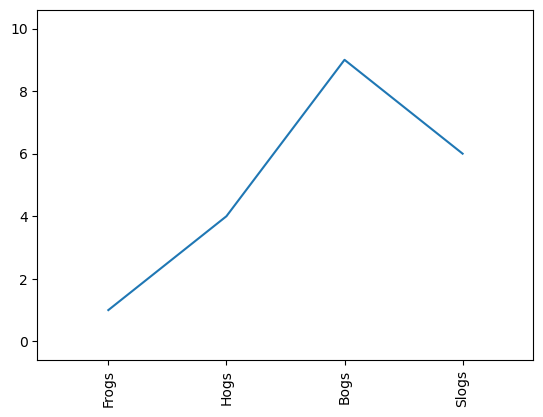

In [66]:

#  Simple 2-d chart
#
#  From,
#     https://matplotlib.org/stable/gallery/ticks/ticklabels_rotation.html#sphx-glr-gallery-ticks-ticklabels-rotation-py
#

x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)


plt.show()


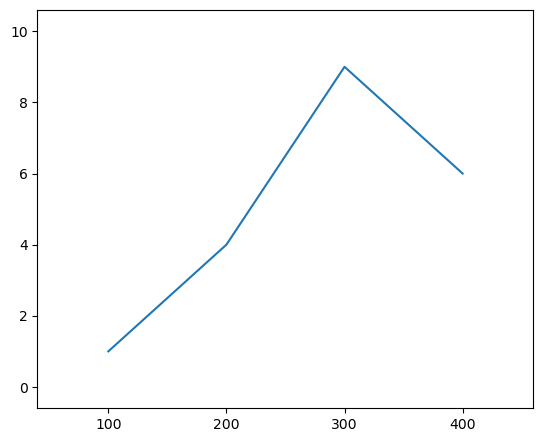

In [74]:

#  My 2-d chart, applied
#

l_data = {}
   #
l_data["xycoord"], l_data["label"] = ([1, 2, 3, 4], [1, 4, 9, 6]), [100, 200, 300, 4
   #
labels = [100, 200, 300, 400]

plt.plot(x, y)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation = "horizontal")

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.05)


plt.show()






